# NPV - Visualisation

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('C:/Users/Lenovo/Desktop/Mini_Project_NPV/emp_health.csv')
data

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


Read the dataset and do primary study of data. Perform following steps: 
 a. Reading some rows of dataset
 b. Learn data types of all features
 c. See the statistical properties of the data


In [8]:
data.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [9]:
data.tail()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1333,i11345,50,male,30.97,3,no,no,west,10600.5483
1334,i11346,18,female,31.92,0,daily,no,east,2205.9808
1335,i11347,18,female,36.85,0,weekend,no,southeast,1629.8335
1336,i11348,21,female,25.80,0,party,no,southwest,2007.9450
1337,i11349,61,female,29.07,0,no,yes,west,29141.3603


In [12]:
data.sample(5)

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
906,i10918,27,male,32.585,3,daily,no,east,4846.92015
650,i10662,49,female,42.680,2,daily,no,east,9800.88820
697,i10709,41,male,35.750,1,no,yes,east,40273.64550
1180,i11192,42,female,41.325,1,party,no,east,7650.77375
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [14]:
data.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. How many employees above 50 age smoke, what is their average expenditure on health management?

In [23]:
a = data[(data['age'] > 50) & (data['smoke'] == 'yes')]
a.count()

id             64
age            64
sex            64
bmi            64
dependent      64
alcohol        64
smoke          64
zone           64
expenditure    64
dtype: int64

In [ ]:
# There are total 64 employees above the age of 50 yrs who smoke.

In [25]:
a['expenditure'].mean()

38820.22308234375

In [ ]:
# And their average expenditure on health management is Rs. 38,820.22.

 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [36]:
b = data[(data['sex'] == 'female') & (data['alcohol'] != 'daily')]
b.count()

id             453
age            453
sex            453
bmi            453
dependent      453
alcohol        453
smoke          453
zone           453
expenditure    453
dtype: int64

In [38]:
c = data['sex'] == 'female'
c.count()

1338

In [41]:
propn = (453/1338)*100
propn

33.856502242152466

In [ ]:
# There are total 453 female employees who do not consume alcohol daily. 
# And their proportion with respect to total female employees is 33.8 %.

 3. Display zone wise average expenditure of employees on health

In [49]:
d = data.groupby('zone')['expenditure'].mean()
d

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

In [ ]:
# Above result shows zone wise health expenditure of employees.

 4. Employees of which zone did maximum expenditure on health

In [66]:
d.max()

14715.689519285717

In [ ]:
# From the above result, we can conclude that employees from south zone 
# with average health expenditure of Rs. 14715.68 have done the maximum 
# expenditure on health.

 5. What is the minimum expenditure done by any employee in organization

In [65]:
data[(data['expenditure'] == data['expenditure'].min())]

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
940,i10952,18,male,23.21,0,party,no,southeast,1121.8739


In [ ]:
# The minimum expenditure done by any employee in the organisation 
# is Rs. 1,121.87.

 6. What is average expenditure of employees who have 2 or lesser dependents

In [69]:
data[(data['dependent'] <= 2)]['expenditure'].mean()

13040.970970948145

In [ ]:
# Average expenditure of employees having 2 or lesser dependents 
# is Rs. 13,040.97.

 7. How many employees are below age of 20 years. What is their average BMI.

In [76]:
data[data['age'] < 20].count()

id             137
age            137
sex            137
bmi            137
dependent      137
alcohol        137
smoke          137
zone           137
expenditure    137
dtype: int64

In [78]:
data[data['age'] < 20]['bmi'].mean()

29.971496350364966

In [79]:
# There are total 137 employees below the age of 20 and their average 
# BMI is 29.97.

 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [85]:
non_smoker = pd.DataFrame(data[(data['smoke'] == 'no') & (data['sex'] == 'male')])
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [86]:
non_alcoholic = pd.DataFrame(data[(data['alcohol'] == 'no') & (data['sex'] == 'male')])
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol

In [110]:
non_smoking_alcoholic = pd.merge(non_smoker, non_alcoholic, how = 'inner')
non_smoking_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10030,56,male,40.300,0,no,no,southwest,10602.38500
1,i10036,37,male,28.025,2,no,no,northwest,6203.90175
2,i10040,23,male,17.385,1,no,no,northwest,2775.19215
3,i10049,26,male,20.800,0,no,no,southwest,2302.30000
4,i10079,40,male,26.315,1,no,no,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...
104,i11273,28,male,37.100,1,no,no,southwest,3277.16100
105,i11282,26,male,33.915,1,no,no,west,3292.52985
106,i11322,42,male,26.315,1,no,no,west,6940.90985
107,i11332,31,male,31.065,3,no,no,west,5425.02335


11.What is the count for each zone with respect to number of dependent

In [111]:
data['dependent'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: dependent, dtype: int64

In [ ]:
# Above table shows the count for each zone with respect to no. of dependents.

 12. Classify the employees into 3 categories.
 Category 1 : employees below 18.5 bmi - underweight
 Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
 Category 3 : employee with bmi over 24.9 - overweight
 What is the average expenditure of employees in each category.
 Display the bar chart for the same


In [122]:
cat_1_underweight = data[data['bmi'] < 18.5]
cat_2_fit = data[(data['bmi'] > 18.5) & (data['bmi'] < 24.9)]
cat_3_overweight = data[data['bmi'] > 24.9]

In [129]:
print('underweight - catergory 1 mean exp: ', cat_1_underweight['expenditure'].mean())
print('fit         - catergory 2 mean exp: ', cat_2_fit['expenditure'].mean())
print('overweight  - catergory 3 mean exp: ', cat_3_overweight['expenditure'].mean())

underweight - catergory 1 mean exp:  8852.200585000002
fit         - catergory 2 mean exp:  10404.900083891405
overweight  - catergory 3 mean exp:  13936.616823466235


In [ ]:
# Above results show the average heath expenditure for each category.

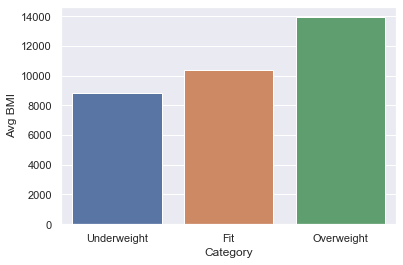

In [195]:
bmi_catg = pd.DataFrame({'Category': ['Underweight','Fit','Overweight'],
                         'Avg BMI': [8852.20,10404.90,13936.61]})
sns.barplot('Category', 'Avg BMI', data = bmi_catg);

 13. Draw line plot of expenditure against age and BMI

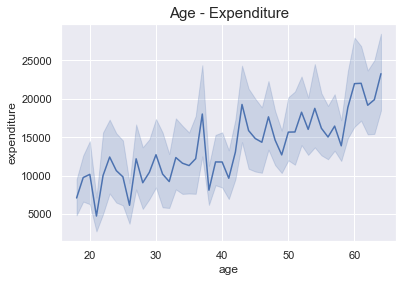

In [194]:
plt.title('Age - Expenditure', fontsize = 15)
sns.lineplot('age', 'expenditure', data = data);

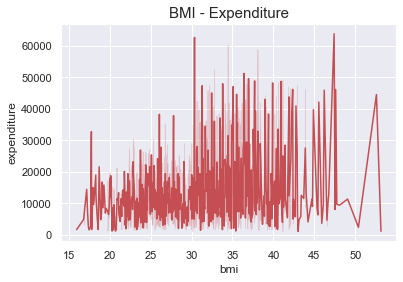

In [193]:
plt.title('BMI - Expenditure', fontsize = 15)
sns.lineplot('bmi', 'expenditure', color = 'r' , data = data);

14. Draw a bar chart to show zone wise average expenditure

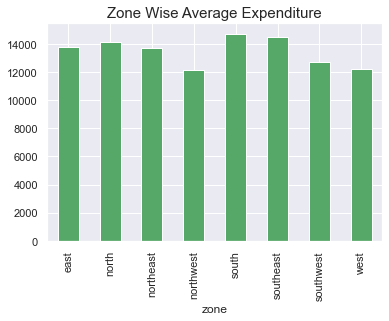

In [191]:
e = data.groupby('zone')['expenditure'].mean()
plt.title('Zone Wise Average Expenditure', fontsize = 15)
e.plot(kind = 'bar', color = 'g');

15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

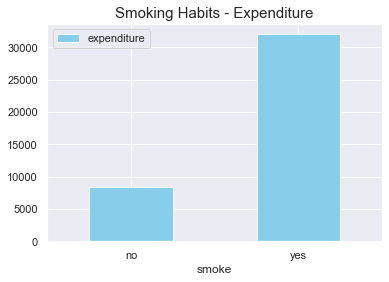

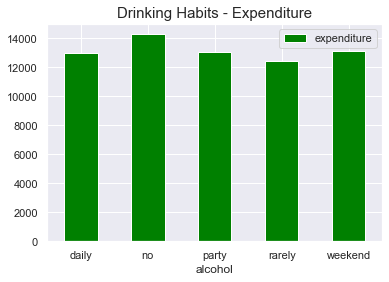

In [260]:
f = data.groupby('smoke')[['expenditure']].mean()
g = data.groupby('alcohol')[['expenditure']].mean()
f.plot(kind = 'bar', color ='skyblue', rot = 0);
plt.title('Smoking Habits - Expenditure', fontsize = 15);
g.plot(kind = 'bar', color ='green', rot = 0);
plt.title('Drinking Habits - Expenditure', fontsize = 15);


16. Draw pie chart for alcohol consumption habits

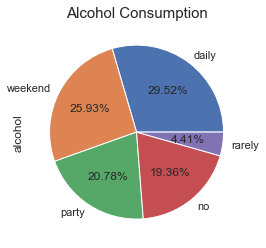

In [288]:
data.alcohol.value_counts().plot(kind = 'pie', autopct = '%0.2f%%');
plt.title('Alcohol Consumption', fontsize = 15);


17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

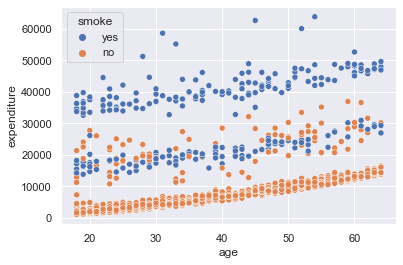

In [301]:
sns.scatterplot('age','expenditure', data = data, hue = 'smoke');

 18. Draw distribution plot of expenditure

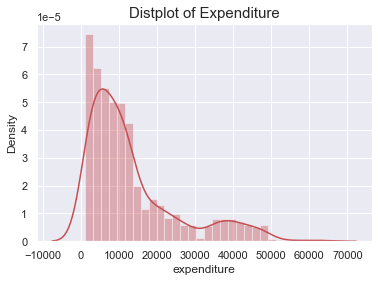

In [312]:
i = data['expenditure']
sns.distplot(i, color = 'r');
plt.title('Distplot of Expenditure', fontsize = 15);

 19. Display the pairplot

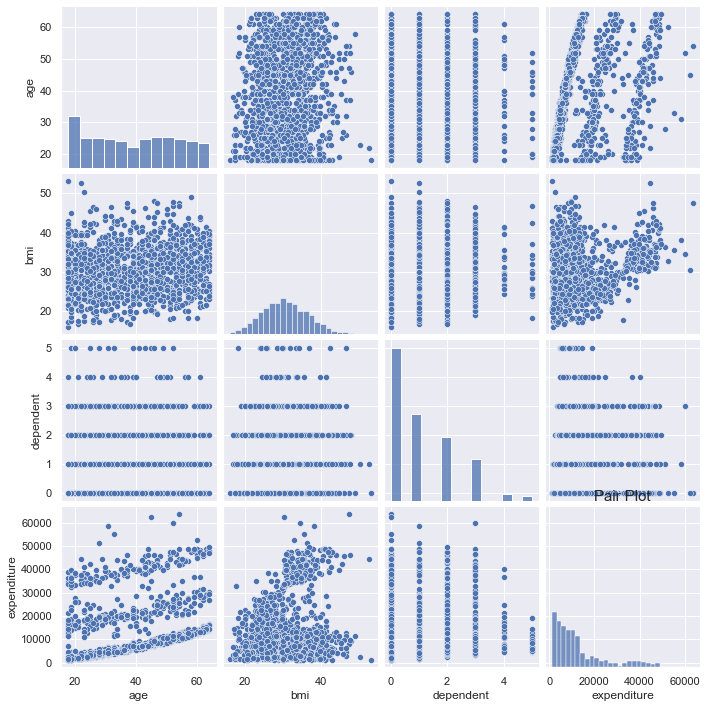

In [318]:
sns.pairplot(data = data);
plt.title('Pair Plot', fontsize = 15);

20. Display heatmap for the data

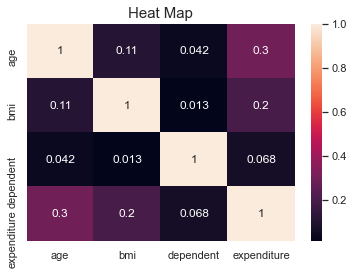

In [324]:
sns.heatmap(data.corr(), annot = True);
plt.title('Heat Map', fontsize = 15);